## 03 Boston 데이터 셋 회귀 모델 적용
<pre>
(가) 사전 준비(데이터 셋 로드)
(나) 모델 만들고 훈련, 테스트 데이터 점수 확인
(다) 릿지 회귀(Ridge)
(라) 릿지 회귀(Ridge)와 선형회귀 비교
</pre>

## 01. 사전 준비 - 보스턴 데이터 셋 Load

In [58]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import matplotlib.pyplot as plt

# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

In [59]:
def load_extended_boston():
    boston = load_boston()  # 데이터 셋 불러오기
    X = boston.data         # 입력 데이터 
    
    X = MinMaxScaler().fit_transform(boston.data)  # 입력 데이터 정규화
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [60]:
X, y = load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


## 02. 사전 준비 - 모델 만들고 훈련, 테스트 데이터 점수 확인
<pre>
성능 차이는 우리는 이를 모델(훈련용)이 과대 적합(Overfitting)라고 말할 수 있다.
</pre>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79


## 03. 릿지 회귀(Ridge) - (티호노프Tikhonov 규제)
<pre>
A. 모델을 복잡도를 제어한다.
B. 방법은 가중치의 절대값을 가능한 작게 만드는 것이다.(기울기를 작게 만들기)
   --> 규제(regularization)
C. linear_model.Ridge 이용
=> 적용 결과 : Ridge 적용 결과, 더 일반화된 모델이 된다.
=> LinearRegression 보다 Ridge 모델을 선택해야 함.
</pre>

In [62]:
# from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


## 04. 릿지 회귀(Ridge)-alpha
<pre>
A. 앞의 예제는 alpha를 1.0으로 이용
B. alpha는 데이터 셋에 달려있다.
C. alpha는 모델을 얼마나 많이 규제할지 조절한다.
</pre>
<img src="img/ridge01.png">

In [63]:
ridge5 = Ridge(alpha=5).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge5.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge5.score(X_test, y_test)))

훈련 세트 점수 : 0.80
테스트 세트 점수 : 0.76


## 실습과제 1
<pre>
(가) alpha = 0.00001로 지정 후, 점수를 구해보자.
(나) 위의 평가 점수는 어떤 점수와 비슷한가?, alpha의 값을 줄이면 어떤 모델과 거의 비슷해 지는가?
</pre>

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.79


In [65]:
# ridge5 = Ridge(alpha=5).fit(X_train, y_train)
print(ridge5.coef_.shape)
ridge5.coef_[1:10]

(104,)


array([ 0.10664892, -0.51386182,  0.3393437 , -0.75507706,  5.81283936,
       -0.37466642, -3.08063128,  1.62371882, -1.06171789])

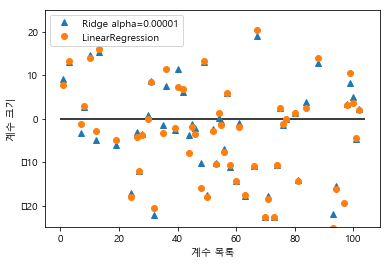

In [66]:
ridge01 = Ridge(alpha=0.00001).fit(X_train, y_train)

plt.plot(ridge01.coef_, "^", label="Ridge alpha=0.00001")
plt.plot(lr.coef_, 'o', label="LinearRegression")


plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## 실습과제 2
<pre>
(가) alpha = 10, 1, 0.1 일 때의 그래프를 표시해 보자.
(나) alpha가 커질 수록 모델의 계수는 어떻게 되는가?
</pre>

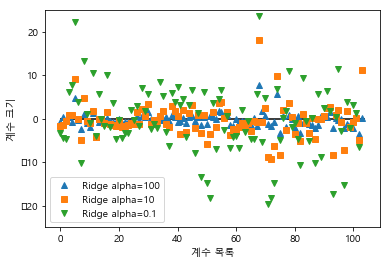

## 05. 학습 곡선(learning curve)
<pre>
(1) alpha의 값을 고정하고, 훈련 데이터의 크기를 변화시킨다.
보스턴 주택가격 데이터 셋에서 여러가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용시킨 것.
</pre>

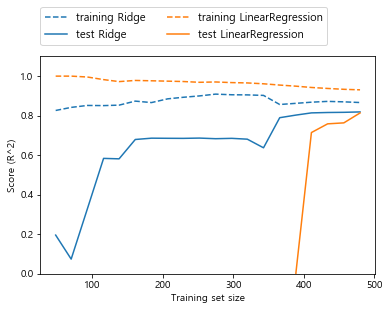

In [68]:
import mglearn
mglearn.plots.plot_ridge_n_samples()

<pre>
(가) 릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀 훈련 데이터 점수보다 낮다.
(나) 테스트 데이터에서는 릿지의 점수가 더 높으며 특별히 작은 데이터 셋에서는 더 그렇다.
</pre>

###  상세 내용 참조
http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf